<h1> <centering> ECE 653 Final Project: Check Your Perturbations </centering> </h1>
<h3> By Joseph Scott, Laura Graves, and Vineel Nagisetty </h3>

In [1]:
# clone the repo if running on colab
import warnings
warnings.filterwarnings('ignore')

try:
    import google.colab
    !git clone https://github.com/vin-nag/checkYourPerturbations.git
    !pip install func_timeout
    !pip install tqdm
    %cd ./checkYourPerturbations/
    !git clone https://github.com/tensorflow/cleverhans
    %cd cleverhans
    !pip install .
    %cd ./../
    inColab = True
except:
    %cd ./../
    inColab = False

/home/vineel/PycharmProjects/cs858/checkYourPerturbations/src


In [2]:
# imports
from src.generator.factory import GeneratorSelector, GeneratorTypes
from src.benchmark import BenchmarkEnums, Benchmark
from src.evaluator import Evaluator
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
# load the generators
selector = GeneratorSelector()
generators = selector.getAllGenerators()

# view the different generators
for generator in generators:
    print(generator)

StepFuzz
NormFuzz
LaplaceFuzz
VinFuzz
DLFuzz
bim
fgsm


In [4]:
# load and view the benchmark
if inColab:
    %cd ./../
benchmark = Benchmark(BenchmarkEnums.Demo)
benchmark.data.head(3)

Created benchmark with shape: (4, 4).


,modelName,model,image,cls
0,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",9
1,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",1
2,robust,<tensorflow.python.keras.engine.sequential.Seq...,"[[[[-0.5], [-0.5], [-0.5], [-0.5], [-0.5], [-0...",3


100%|██████████| 7/7 [05:00<00:00, 42.91s/it]


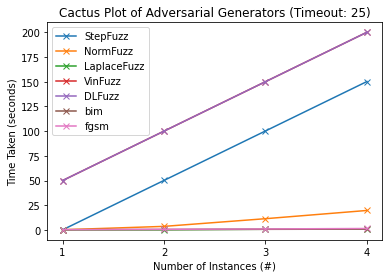

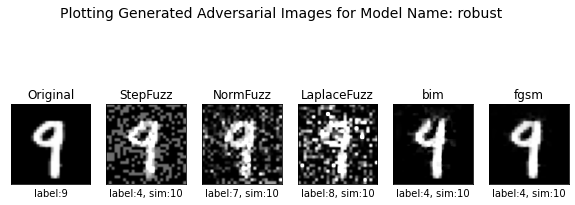

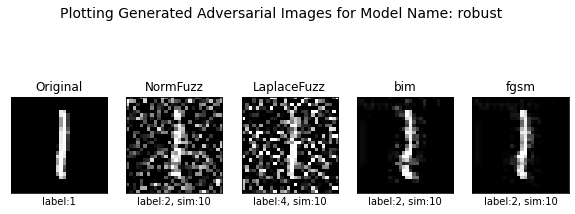

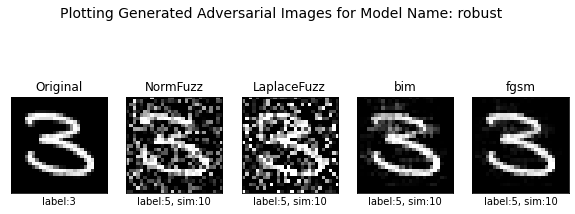

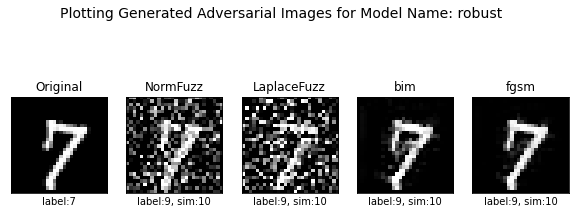

In [5]:
# perform evaluation
evaluator = Evaluator(benchmark=benchmark, generators=generators, timeLimit=25, verbose=False)
results = evaluator.evaluate(display=False)